## 8_2 KNN using SKLEARN

In [22]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')

In [23]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


## 데이터 나누기

In [24]:
df=pd.get_dummies(df,columns=['origin'])
y=df['mpg']
X=df.drop(columns=['mpg'])

## 데이터 정규화

In [26]:
X_norm = (X-X.mean())/X.std()
X_norm

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,0.773608,-0.457538,-0.501749
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,0.773608,-0.457538,-0.501749
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,0.773608,-0.457538,-0.501749
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,0.773608,-0.457538,-0.501749
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,0.773608,-0.457538,-0.501749
...,...,...,...,...,...,...,...,...,...
387,-0.862911,-0.519972,-0.479835,-0.220842,0.021267,1.634321,0.773608,-0.457538,-0.501749
388,-0.862911,-0.930889,-1.363154,-0.997859,3.283479,1.634321,-1.289347,2.180035,-0.501749
389,-0.862911,-0.567753,-0.531795,-0.803605,-1.428605,1.634321,0.773608,-0.457538,-0.501749
390,-0.862911,-0.711097,-0.661694,-0.415097,1.108671,1.634321,0.773608,-0.457538,-0.501749


## KNN 학습

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate

kfold=KFold(n_splits=5, shuffle=True)
train_mse=[]
test_mse=[]
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)    
    result=cross_validate(X=X_norm,y=y,
                          cv=kfold,
                          scoring=['r2','neg_mean_squared_error'],
                          estimator=knn,
                          return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())
    

2 0.8376847491178362 -9.801922671210647
3 0.8408167674370046 -9.362163042302283
4 0.8571904653643369 -8.568158592989288
5 0.8612386461133766 -8.390629457968194
6 0.855030766623772 -8.675753119477804
7 0.8600133181356833 -8.504932330478443
8 0.8467163363853281 -9.321430126176566
9 0.8396875010844477 -9.40019817599705
10 0.8331639112780229 -9.902259126906847
11 0.8245042147448283 -10.356861896829676
12 0.8340580882506285 -10.10687546206138
13 0.822742647702326 -10.77298661196991
14 0.8036976082025143 -11.544712669488435
15 0.8071013637755293 -11.414992348804502
16 0.8087370692463581 -11.422627633327249
17 0.8074219006529525 -11.815392566786723
18 0.799960772031693 -11.965701215334125
19 0.7987923883365542 -12.222962937888463
20 0.7959979061401461 -12.333146140051928
21 0.7886764492086821 -12.814937232882983
22 0.7871999510495477 -12.667670196029515
23 0.7769908241633865 -13.455750578121041
24 0.7904690139092633 -12.667445558463161
25 0.7829045851559394 -12.968203110159042
26 0.7691722041

## 하이퍼 패러미터의 영향

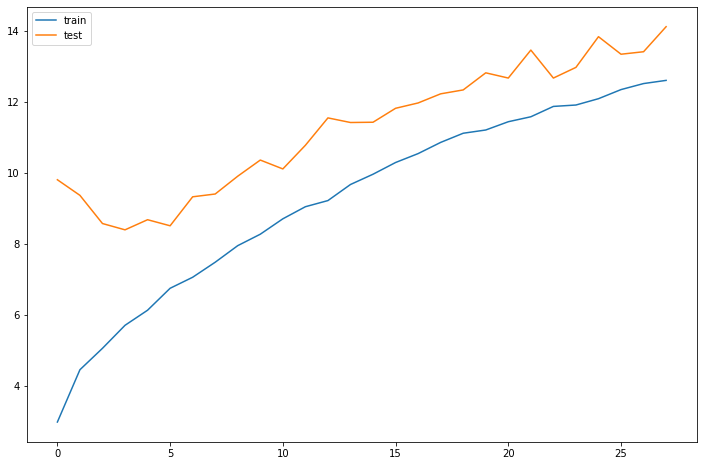

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse, label='train')
plt.plot(test_mse, label='test')
plt.legend()


## KNN using GridSearchCV

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
import warnings

# 경고문구 없애기
warnings.filterwarnings('ignore')

# 파이프라인 재료 만들기
scaler = StandardScaler() #데이터 스케일링
knn = KNeighborsRegressor() #KNN Regressor

# 파이프라인 만들기
pipe = Pipeline([('scaler',scaler),('knn',knn)])

# 하이퍼패러미터 범주 지정
degree = range(1,19)
param_grid = {'knn__n_neighbors': degree}

# 교차검증 객체 지정
kfold = KFold(n_splits = 5, shuffle = True)

# GridSearchCV를 이용하여 하이퍼패러미터 튜닝
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    return_train_score=True    
)

#학습
grid_search.fit(X,y)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': range(1, 19)},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
import pandas as pd
df=pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004412,0.002009,0.002122,0.000356,1,{'knn__n_neighbors': 1},-9.619620,-9.853291,-11.917051,-9.753077,...,-11.336736,2.265686,15,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.003349,0.000233,0.001967,0.000134,2,{'knn__n_neighbors': 2},-8.602753,-9.616582,-6.519744,-8.864519,...,-9.396040,2.239572,7,-3.192572,-3.049832,-3.088742,-3.221457,-2.457667,-3.002054,0.279496
2,0.003058,0.000046,0.002004,0.000129,3,{'knn__n_neighbors': 3},-8.158917,-9.512700,-6.342806,-6.845171,...,-8.573945,2.040956,1,-4.505556,-4.175332,-4.533432,-4.843740,-4.039112,-4.419434,0.284492
3,0.002950,0.000025,0.001973,0.000095,4,{'knn__n_neighbors': 4},-9.718995,-8.962840,-6.325889,-7.267139,...,-8.854843,1.978017,4,-5.122330,-4.719191,-5.385677,-5.430153,-4.956003,-5.122671,0.266192
4,0.003103,0.000059,0.001927,0.000052,5,{'knn__n_neighbors': 5},-9.644957,-8.954223,-6.027467,-6.956795,...,-8.680322,2.042538,2,-5.507458,-5.306594,-5.915503,-6.266454,-5.402864,-5.679775,0.359276
5,0.003277,0.000156,0.002156,0.000113,6,{'knn__n_neighbors': 6},-9.944828,-8.142679,-6.463152,-7.393052,...,-8.719783,1.860274,3,-5.937018,-5.743170,-6.229742,-6.522465,-5.908587,-6.068197,0.275965
6,0.003246,0.000135,0.002099,0.000126,7,{'knn__n_neighbors': 7},-11.316159,-8.061565,-6.828407,-8.016180,...,-9.165424,1.927546,5,-6.483843,-6.610934,-6.794855,-6.926362,-6.166696,-6.596538,0.262977
7,0.003160,0.000113,0.002015,0.000053,8,{'knn__n_neighbors': 8},-10.940949,-7.900271,-7.184844,-8.553548,...,-9.262940,1.766682,6,-6.976188,-6.592710,-7.343560,-7.237548,-6.740622,-6.978126,0.284886
8,0.003033,0.000052,0.001997,0.000078,9,{'knn__n_neighbors': 9},-11.097411,-8.054705,-6.894935,-8.980882,...,-9.401915,1.887161,8,-7.437408,-7.135654,-8.114862,-7.598943,-7.093974,-7.476168,0.370548
9,0.003166,0.000096,0.002065,0.000076,10,{'knn__n_neighbors': 10},-11.903885,-7.830824,-6.833977,-9.541217,...,-9.673845,2.151137,9,-7.629808,-7.528750,-8.491766,-8.172891,-7.322425,-7.829128,0.434503


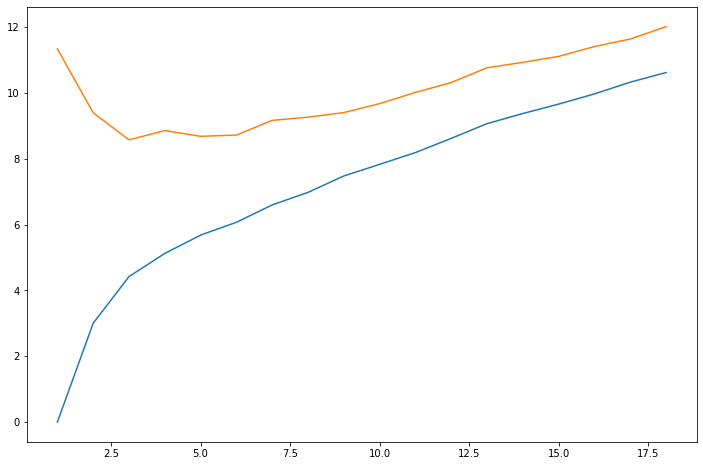

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(df['param_knn__n_neighbors'], -df['mean_train_score'])
plt.plot(df['param_knn__n_neighbors'], -df['mean_test_score'])


In [32]:
grid_search.best_params_, grid_search.best_score_

({'knn__n_neighbors': 3}, -8.57394457066609)